# Principal component analysis (PCA) in Python


Principle components analysis is a common dimensionality reduction technique. It is sometimes used on its own and may also be used in combination with scale construction and factor analysis. In this tutorial, I will show several ways of running PCA in Python with several datasets.

## PCA vs. LDA - Iris Data Sklearn

Below is a prespecified example (with minor modification), courtesy of [Sklearn](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html), which compares PCA and an alternative algorithm, LDA on the Iris dataset.

The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), found in many clustering or machine learning examples across Python and R, explores several notable features such as sepal length and width and petal length and width for three types of Iris flowers, the [Iris setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg), [Iris versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg), and [Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg).

explained variance ratio (first two components): [ 0.92461621  0.05301557]


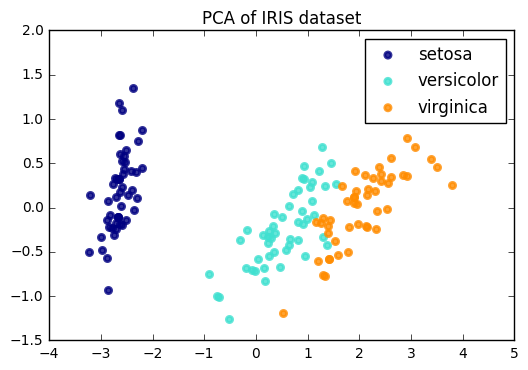

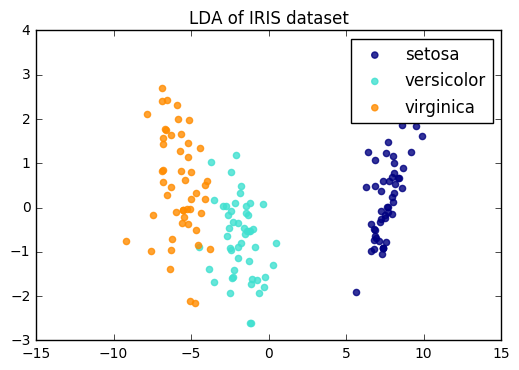

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# PCA - Iris Data Download

The previous result is somewhat simplified from the process you might have to go through if you downloaded data versus using the packaged format of a dataset that comes in a module such as Sklearn. To demonstrate the process, I will once again use the Iris dataset, but download the dataset instead.

In [2]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.to_csv("iris_download.csv", index = False)
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Select Columns (Variables) on which to run PCA
X = df.loc[:, 'sepal_len':'petal_wid'].values
y = df.loc[:, 'class'].values

pca = PCA() #If we do not specify how many components, all are included
X_r = pca.fit(X).transform(X)

In [4]:
target_names = df.ix[:,4].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

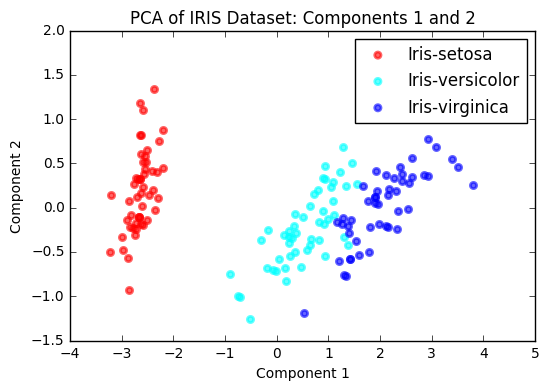

In [5]:
def pca_scatter(pca1, pca2):
    plt.close
    plt.figure()
    colors = ['red', 'cyan', 'blue']
    lw = 2


    for color, target_name in zip(colors, target_names):
        plt.scatter(X_r[y == target_name, pca1], X_r[y == target_name, pca2], color=color, alpha=.6, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS Dataset: Components {} and {}'.format(pca1+1, pca2+1))
    plt.xlabel('Component {}'.format(pca1+1))
    plt.ylabel('Component {}'.format(pca2+1))
    plt.show()
    
pca_scatter(0, 1)

# Selecting Components

Since the aim of PCA is data reduction, we need some criteria or we will have the same number of variables after a PCA. 

One rule of thumb is that a component should not be retained unless it has an eigenvalue greater than or equal to one (the ‘Kaiser’ criterion).

### How can we evaluate the eigenvalues? 

This depends on the approach taken in making the calculation. While I would recommend using the default PCA algorithms in Sklearn, another approach is simply using NumPy. I demonstrate both below with the Iris data.


In [6]:
#Using Numpy on the Previously Defined X-Y
import numpy as np
from sklearn.preprocessing import StandardScaler

#Covariance Matrix
cov_mat = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)


Eigenvalues 
[ 4.22484077  0.24224357  0.07852391  0.02368303]
Eigenvectors 
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [7]:
#Using Sklearn (As Performed Above)

X_r = pca.fit(X).transform(X)
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)


Eigenvalues 
[ 4.19667516  0.24062861  0.07800042  0.02352514]
Eigenvectors 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


#### Note: There are a number of criterion for accepting a principal component. The Kaiser criterion is simple to implement, but a more rigorous method known an Parallel Analysis can also be used. A program could be written to evaluate this in Python. Here is an [example of the implementation in Stata](https://stats.idre.ucla.edu/stata/faq/how-to-do-parallel-analysis-for-pca-or-factor-analysis-in-stata/).

#### Using the Kaiser criterion, only the first principal component is significant and should be analyzed.



## Visualizing Eigenvalues

Related to the Kaiser criterion and component selection, one visual method of selection is known as a scree plot, an example of which is below.

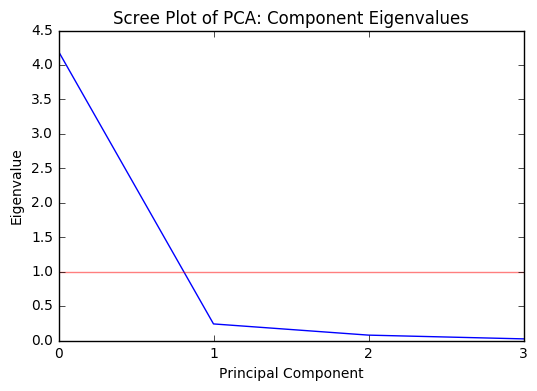

In [8]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()
    
scree_plot()

## Variance Explained

Related to scree plots and eigenvalues is the variance explained (which is directly related to the eigenvalues). This can also be visualized.

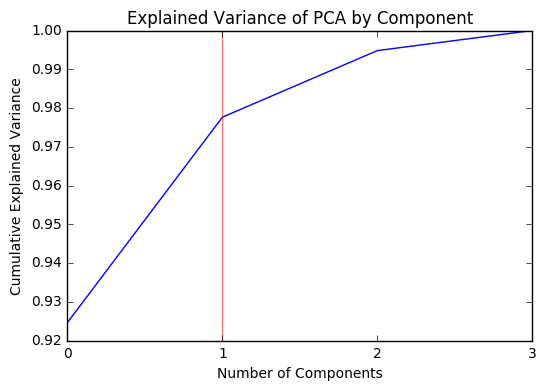

In [9]:
def var_explained():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator
    
    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()
    
var_explained()

#### So approximately 92.5% of the variance is explained by the first principal component (component 0) and about 98% is explained by the first two components.

## Examining PCA Loadings

Another facet of PCA is examining the component loadings or components. This allows us to see how informative a particular variable is for the principal component. Paying attention to the loadings is particularly useful in scale construction using PCA (or PCA in combination with Cronbach's Alpha and Factor Analysis).



In [10]:
#Component Loadings

def loadings():
    loadings = pca.components_
    results = pd.DataFrame(loadings)
    results.columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
    results.index=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
    print(results)
    
loadings()

           Component 1  Component 2  Component 3  Component 4
sepal_len     0.361590    -0.082269     0.856572     0.358844
sepal_wid     0.656540     0.729712    -0.175767    -0.074706
petal_len    -0.580997     0.596418     0.072524     0.549061
petal_wid     0.317255    -0.324094    -0.479719     0.751121


In assessing the loadings, we are concerned with the magnitude of the loading on an absolute value scale [0,1], where values closer to one are viewed as more informative of the construct represented by the principal component. 

For the loadings above, we can see that both `sepal width` and `petal length` are highly informative of the first component, which might be thought of as `iris type`. 

## Standardizing Data

Note, to have comparable results running PCA in Python with other statistical programs, such as Stata, we will want to standardize the data we are analyzing. In Sklearn, this can be accomplished with [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

Below, I repeat the PCA with standardized data.

In [11]:
X_std = StandardScaler().fit_transform(X)
X_r = pca.fit(X_std).transform(X_std)


loadings()

           Component 1  Component 2  Component 3  Component 4
sepal_len     0.522372    -0.263355     0.581254     0.565611
sepal_wid     0.372318     0.925556     0.021095     0.065416
petal_len    -0.721017     0.242033     0.140892     0.633801
petal_wid    -0.261996     0.124135     0.801154    -0.523546


#### Note, once the data is standardized, our factor loadings change. Whereas before `sepal width` and `petal length` were the most informative features, now `sepal length` and `petal length` are most informative.  

#### How have the eigenvalues changed?

In [12]:
pca.explained_variance_

array([ 2.91081808,  0.92122093,  0.14735328,  0.02060771])

In [13]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

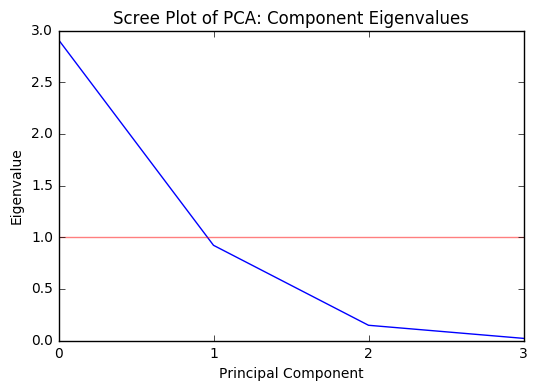

In [14]:
scree_plot()

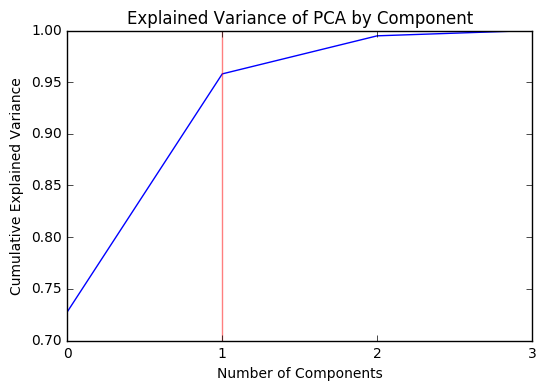

In [15]:
var_explained()

### Comparision with Stata

Note, as indicated, to have comparable results running PCA in Python with other statistical programs, such as Stata, we will want to standardize the data. How do these results compare:

```stata
import delimited "iris_download.csv", clear
pca sepal_len sepal_wid petal_len petal_wid




Principal components/correlation                  Number of obs    =       150
                                                  Number of comp.  =         4
                                                  Trace            =         4
    Rotation: (unrotated = principal)             Rho              =    1.0000

    --------------------------------------------------------------------------
       Component |   Eigenvalue   Difference         Proportion   Cumulative
    -------------+------------------------------------------------------------
           Comp1 |      2.91082       1.9896             0.7277       0.7277
           Comp2 |      .921221      .773868             0.2303       0.9580
           Comp3 |      .147353      .126746             0.0368       0.9948
           Comp4 |     .0206077            .             0.0052       1.0000
    --------------------------------------------------------------------------

Principal components (eigenvectors) 

    --------------------------------------------------------------------
        Variable |    Comp1     Comp2     Comp3     Comp4 | Unexplained 
    -------------+----------------------------------------+-------------
       sepal_len |   0.5224    0.3723   -0.7210   -0.2620 |           0 
       sepal_wid |  -0.2634    0.9256    0.2420    0.1241 |           0 
       petal_len |   0.5813    0.0211    0.1409    0.8012 |           0 
       petal_wid |   0.5656    0.0654    0.6338   -0.5235 |           0 
    --------------------------------------------------------------------



```

## Standardized PCA Plot 



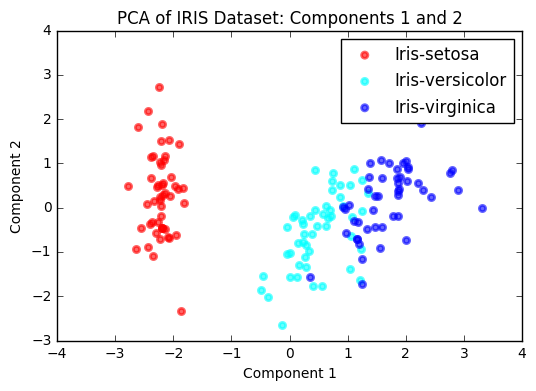

In [16]:
pca_scatter(0, 1)

## Exploring Plot Variations

The example plots of PCA components have been shown to contrast the first principal component versus the second. We can display variations as follows:




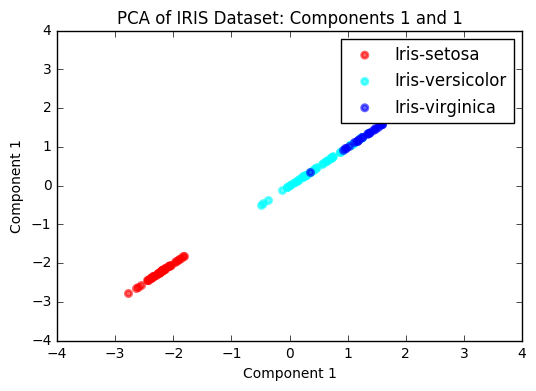

In [17]:
pca_scatter(0, 0)

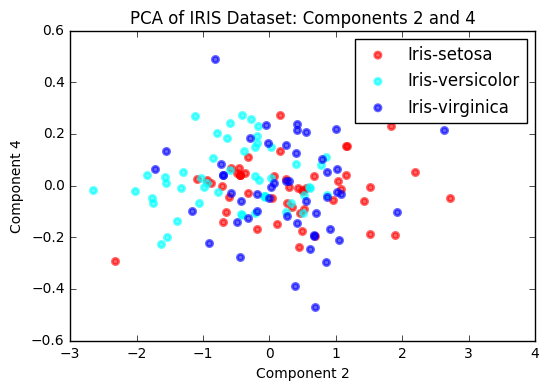

In [18]:
pca_scatter(1, 3)

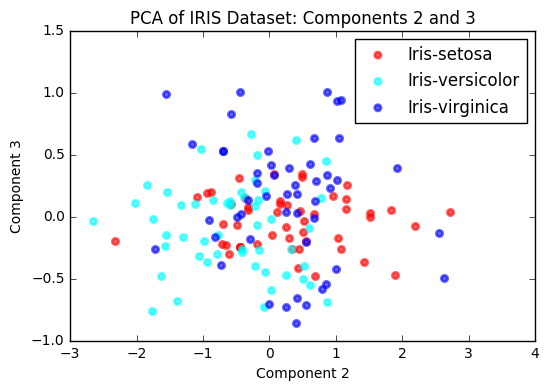

In [19]:
pca_scatter(1, 2)

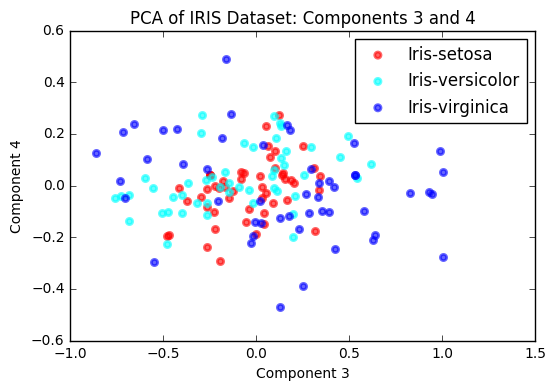

In [20]:
pca_scatter(2, 3)

Analyzing these plots works to substantiate a previously concluded point (from the scree plots, variance plot, and eigenvalue). Whereas we see meaningful differentiation of the Iris flow on the first principal component (which explains about 73% of the variance, the other components explain significantly less.